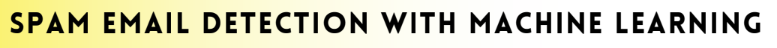

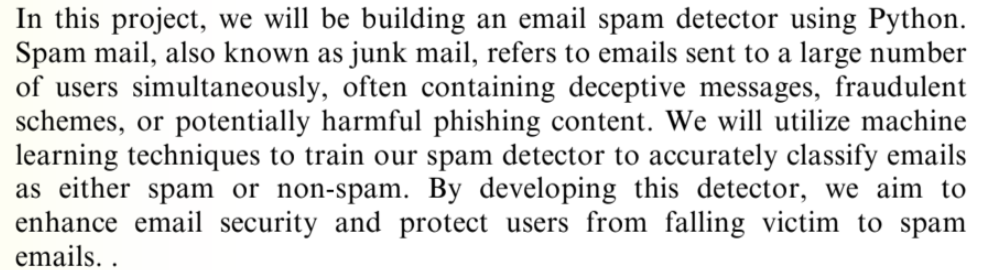

**IMPORT LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

**LOADING THE DATA**

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**VISUALIZATION**

*BARPLOT PLOT TO SEE THE NUMBER OF HAM AND SPAM IN DATASET*

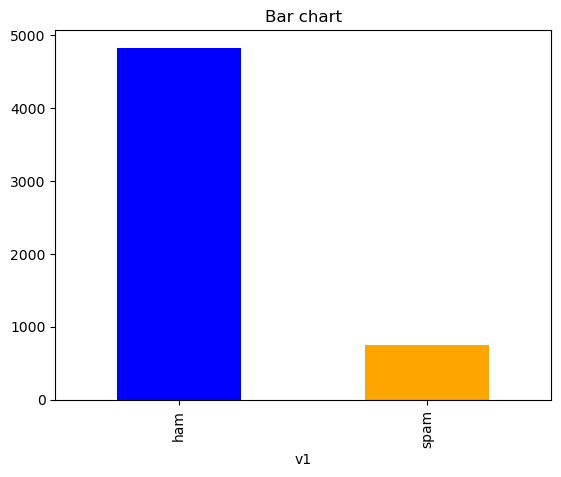

In [4]:
count_Class=pd.value_counts(df["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

*PIE CHART TO SEE THE PERCENTAGE OF SPAM AND HAM IN DATASET*

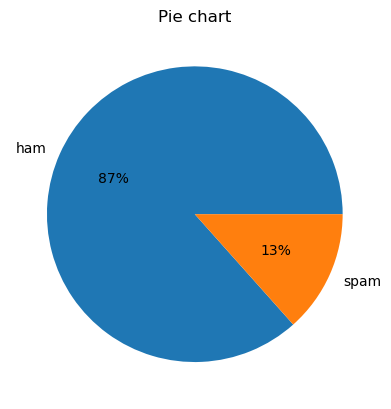

In [5]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

**EXPLORATORY DATA ANALYSIS**

In [6]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

In [9]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
df.dtypes

v1    object
v2    object
dtype: object

In [11]:
# REPLACING spam with 1 and ham with 0

df['v1'] = df['v1'].replace({'spam':1,'ham':0})

In [12]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['v1'].shape

(5572,)

In [14]:
df['v2'].shape

(5572,)

**SPILTTING INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [15]:
x = df['v2']
y = df['v1']

In [16]:
x_train,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 1)

In [17]:
print(x_train.shape)
print(x_test.shape)

(3900,)
(1672,)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [19]:
x_train.shape

(3900, 7201)

In [20]:
x_test.shape

(1672, 7201)

**BUILDING THE MODEL**

In [21]:
from sklearn.naive_bayes import MultinomialNB # using Gaussian algorithm from Naive Bayes

model = MultinomialNB().fit(x_train,y_train)
model.fit(x_train,y_train)

MultinomialNB()

In [22]:
y_predict = model.predict(x_test)

In [23]:
from  sklearn.metrics  import accuracy_score
print("The accuracy is",accuracy_score(y_test,y_predict)*100)

The accuracy is 96.11244019138756
